<font size="6"> **Effects of the Mean Magnitude of Earthquake on Tsunamis** </font> 

<font size="3"> **Group :** 37 </font> 

<font size="3"> **Group Members:** Ruhani Mittal, Vivian Weng, Justina Chen, Gunbir Baveja </font> 

<font size="5"> **1. Introduction** </font> 

Earthquakes are caused by the movement of tectonic plates, which can be thought of as puzzle pieces that make up the surface of the Earth. These tectonic plates are actively moving, and often their plate boundaries (edges of the tectonic plates), will reach a fault and result in an earthquake. Faults are areas on the Earth’s surface where fractures dwell, and it is because of these faults that tectonic plates are able to move. However, these fractures also make tectonic plates stick together due to the friction that the unsmooth surfaces generate. When the motion of the tectonic plates are finally large enough to overcome the static friction, all the energy built up from the movement of the plates is expelled at once, resulting in a huge release of energy.

Tsunamis can be generated when earthquakes occur, particularly when the faults involved are reverse faults. This means that when the two tectonic plates collide, one is forced under the other, which in turn increases the altitude of the ocean floor rapidly. The instantaneous nature of this increase in altitude will force the water that was originally above it to rise rapidly, and then fall over due to gravity’s pull, resulting in a tsunami.

This project will analyze a dataset pertaining to earthquake metrics and resulting tsunamis, and will attempt to answer the question: **Is there a difference between the mean magnitudes of earthquakes that do and do not result in tsunamis?** Such analysis will be conducted by using mean as a location parameter and standard deviation as a scale parameter, since the data present in the dataset is not skewed.

The dataset chosen was published by the National Centers for Environmental Information, then derived from OpenDataSoft (https://public.opendatasoft.com/explore/dataset/significant-earthquake-database/information/).  It displays different characteristics about each earthquake recorded, such as its location, date, time, or different metrics of magnitude. In the raw dataset, there are 42 columns, containing both categorical and quantitative values. One limitation of the dataset is that certain data points have obvious errors in them (such as the reported year being negative) that need to be filtered out to obtain reliable results in analysis. 


<font size="5"> **2. Methods and Result** </font> 

Necessary files were loaded and imported the dataset from the web

In [1]:
#loaded the required libraries
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(dplyr)
library(broom)
library(knitr)
library(grid)

options(repr.plot.width=8, repr.plot.height=6)

#setting the seed
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




<font size="4"> **2.1. Getting dataset from Web** </font> 

In [2]:
#Read the csv file here
earthquake <- read.csv("significant_earthquake_database.csv", sep = ";")
head(earthquake)

,ID.Earthquake,Flag.Tsunami,Year,Month,Day,Focal.Depth,EQ.Primary,Mw.Magnitude,Ms.Magnitude,Mb.Magnitude,⋯,Total.Effects...Missing.Description,Total.Effects...Injuries,Total.Effects...Injuries.Description,Total.Effects...Damages.in.million.Dollars,Total.Effects...Damage.Description,Total.Effects...Houses.Destroyed,Total.Effects...Houses.Destroyed.Description,Total.Effects...Houses.Damaged,Total.Effects...Houses.Damaged.Description,Coordinates
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,78,,334,NA,NA,NA,NA,NA,NA,NA,⋯,,NA,,NA,,NA,,NA,,"41.2, 19.3"
2,84,Tsunami,344,NA,NA,NA,NA,NA,NA,NA,⋯,,NA,,NA,SEVERE (~>$5 to $24 million),NA,,NA,,"40.3, 26.5"
3,9989,Tsunami,346,NA,NA,NA,6.8,NA,6.8,NA,⋯,,NA,,NA,MODERATE (~$1 to $5 million),NA,Many (~101 to 1000 houses),NA,,"41.4, 19.4"
4,110,,438,NA,NA,NA,NA,NA,NA,NA,⋯,,NA,,NA,,NA,,NA,,"35.5, 25.5"
5,9971,Tsunami,557,NA,NA,NA,7.0,NA,7.0,NA,⋯,,NA,,NA,,NA,,NA,,"40.9, 27.6"
6,172,,742,NA,NA,NA,NA,NA,NA,NA,⋯,,NA,,NA,,NA,,NA,,"35.0, 38.0"


    Table 1: Dataset from the web

<font size="4"> **2.2. Tidying the Data** </font> 

- The columns with non-negative values of `Year`, and `NA` values in `Ms.Magnitude` were removed 
- Only the pertinent columns `Year`, `Ms.Magnitude`, `Tsunami` were selected

In [3]:
# The data is tidy
# ID.Earthquake = ID of the earthquake
# Tsunami (boolean) = Tsunami caused or not
# Ms.Magnitude = Surface Wave Magnitude

earthquake_pop <- earthquake %>%
      filter(Year > 0,
            Ms.Magnitude != "NA") %>%
      mutate(Tsunami = (Flag.Tsunami == "Tsunami")) %>%
      select(ID.Earthquake, Tsunami, Ms.Magnitude) 

head(earthquake_pop)

,ID.Earthquake,Tsunami,Ms.Magnitude
,<int>,<lgl>,<dbl>
1,9989,TRUE,6.8
2,9971,TRUE,7.0
3,5945,TRUE,7.0
4,782,TRUE,8.4
5,835,FALSE,7.5
6,1081,TRUE,8.4


    Table 2: Dataset with only pertinent columns

The tidied data resulted in 2914 observations in total.

Column Specification: 

- `ID.Earthquake` = ID of the earthquake
- `Tsunami` (boolean) = Tsunami caused or not
- `Ms.Magnitude` = Surface Wave Magnitude (based on measurements of Rayleigh surface waves that travel along the uppermost layers of the Earth)

<font size="4"> **2.3. Preliminary Analysis** </font> 

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


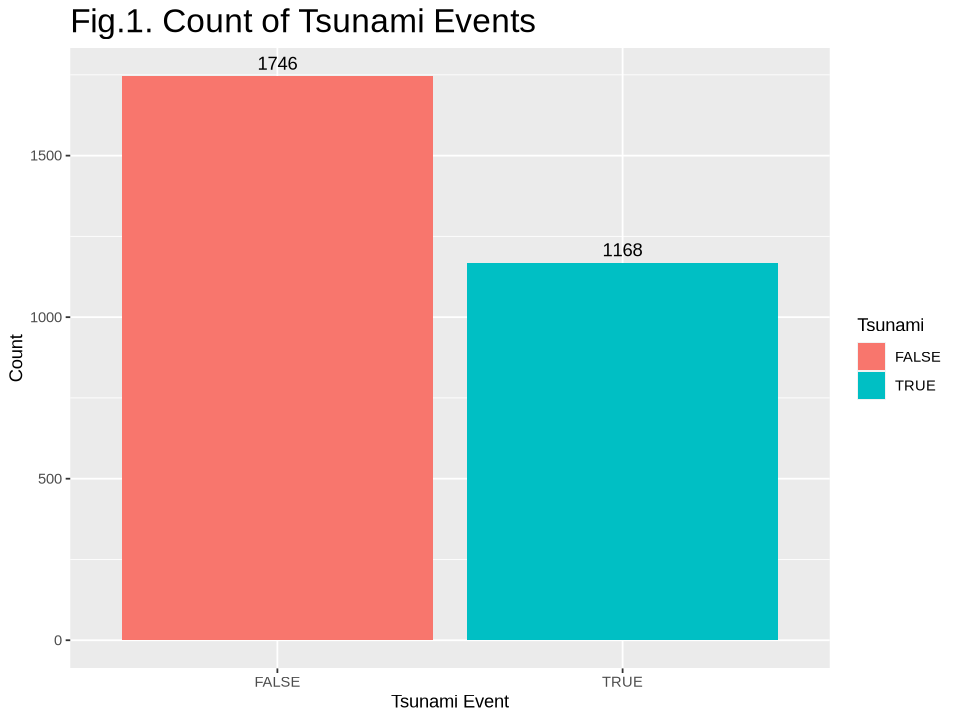

In [4]:
tsunami_count <- ggplot(earthquake_pop, aes(x = Tsunami, fill = Tsunami)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) + 
  labs(title = "Fig.1. Count of Tsunami Events",
       x = "Tsunami Event",
       y = "Count") +
  theme(plot.title = element_text(size = 20)) +
  scale_color_manual(values = c("FALSE" = "orange", "TRUE" = "steelblue"))

tsunami_count

To ensure the representativeness of our data concerning tsunami events, we conducted a thorough analysis of the number of observations for each scenario. We identified 1,746 instances where a tsunami did not occur and 1,168 instances where a tsunami did occur.

After tidying the dataset we got from the internet, we are now using the dataset as the population data (since there is no way for us to get the actual population data) and we visualize the population distribution.

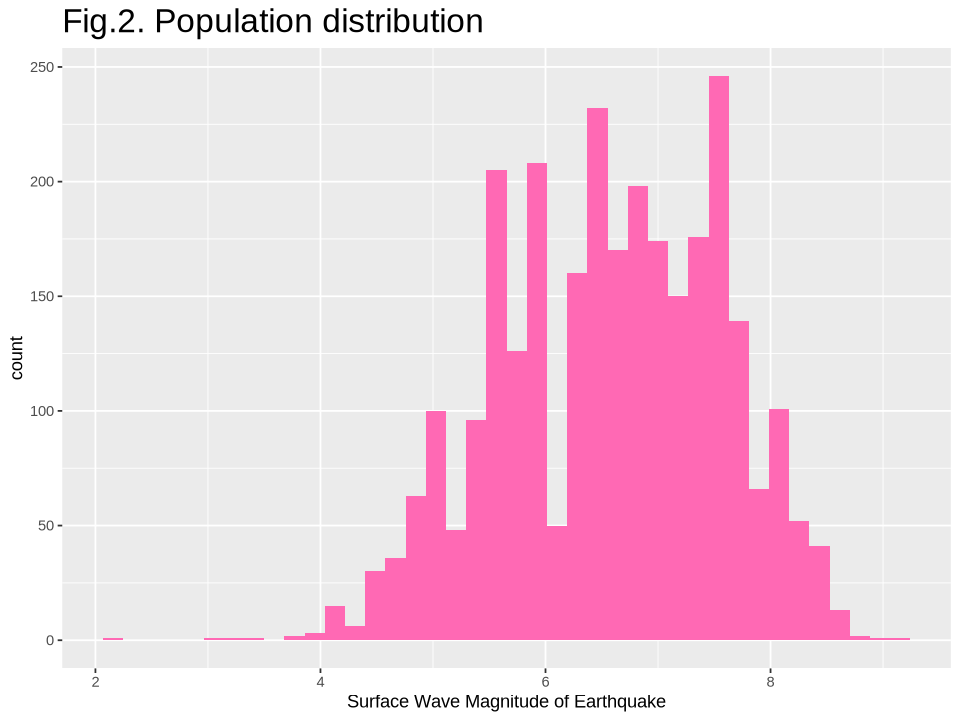

In [5]:
earthquake_population_dist <- earthquake_pop %>%
  ggplot(aes(x = Ms.Magnitude)) +
  geom_histogram(bins = 40, fill = "hotpink") +
  ggtitle("Fig.2. Population distribution") +
  theme(plot.title = element_text(size = 20)) +
  xlab("Surface Wave Magnitude of Earthquake")

earthquake_population_dist

Here we calculated the **mean of surface wave magnitude of earthquake** of the population and the **difference in means of magnitude that do and do not result in the tsunami**.

In [6]:
#population mean
pop_mean <- earthquake_pop %>%
       summarize(mean = mean(Ms.Magnitude))
pop_mean <- as.numeric(pop_mean)

cat("Mean of the magnitide of Earthquake =" , pop_mean)

Mean of the magnitide of Earthquake = 6.573164

In [7]:
earthquake_summarize <- earthquake_pop %>%
    group_by(Tsunami) %>%
    summarize(mean_tsunami_event = mean(Ms.Magnitude))

earthquake_summarize

Tsunami,mean_tsunami_event
<lgl>,<dbl>
FALSE,6.235510
TRUE,7.077911


    Table 3: Mean of Magnitude of Earthquake from the Population dataset by Tsunami 

In [8]:
pop_diff_mean = earthquake_summarize$mean_tsunami_event[2] - earthquake_summarize$mean_tsunami_event[1]

cat("Difference in mean of magnitude that do and do not result in tsunami =" , pop_diff_mean)

Difference in mean of magnitude that do and do not result in tsunami = 0.8424012

We then took a sample of size 100 from the dataset, that was representative of both the groups, to produce a sample distribution.

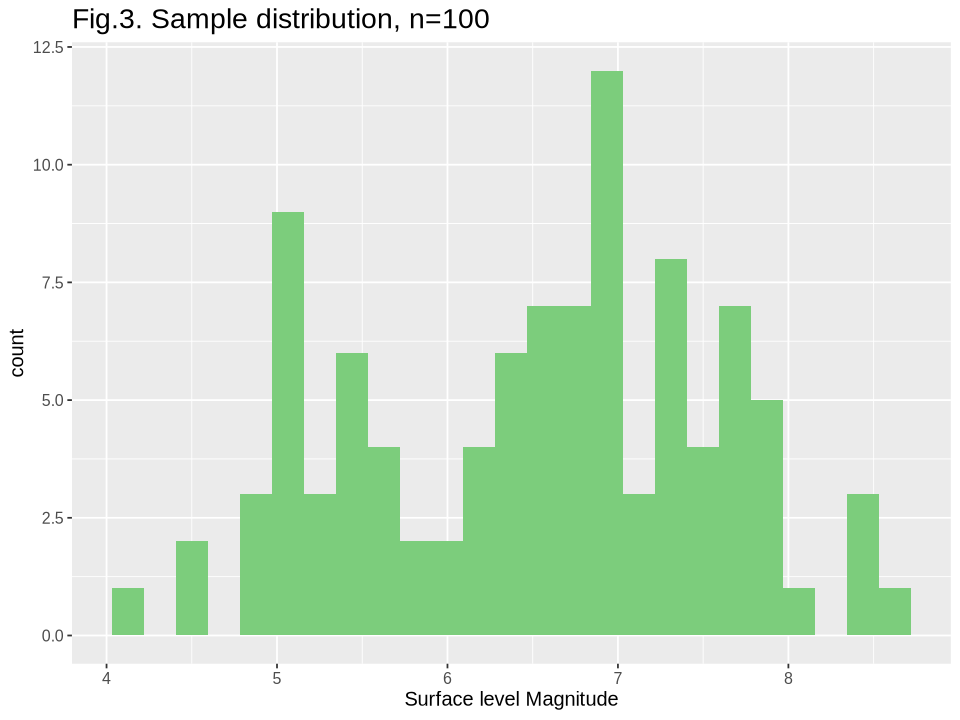

In [9]:
set.seed(1)

earthquake_sample <- earthquake_pop %>% 
    filter(Tsunami== TRUE) %>% 
    sample_n(size=50) %>% 
    bind_rows(
        earthquake_pop %>% 
            filter(Tsunami==FALSE) %>% 
            sample_n(size=50))

earthquake_sample_dist <- 
    earthquake_sample %>% 
    ggplot() + 
    geom_histogram(aes(x = Ms.Magnitude), bins = 25, fill = "palegreen3") +
    ggtitle("Fig.3. Sample distribution, n=100") +
    theme(plot.title = element_text(size = 17),
         text = element_text(size = 12)) +
    xlab("Surface level Magnitude")

earthquake_sample_dist

In [10]:
set.seed(1)

earthquake_summarize <- earthquake_sample %>%
    group_by(Tsunami) %>%
    summarize(mean_tsunami_event = mean(Ms.Magnitude))

earthquake_summarize

Tsunami,mean_tsunami_event
<lgl>,<dbl>
FALSE,5.994
TRUE,7.050


    Table 4: Mean of Magnitude of Earthquake from the Sample dataset by Tsunami

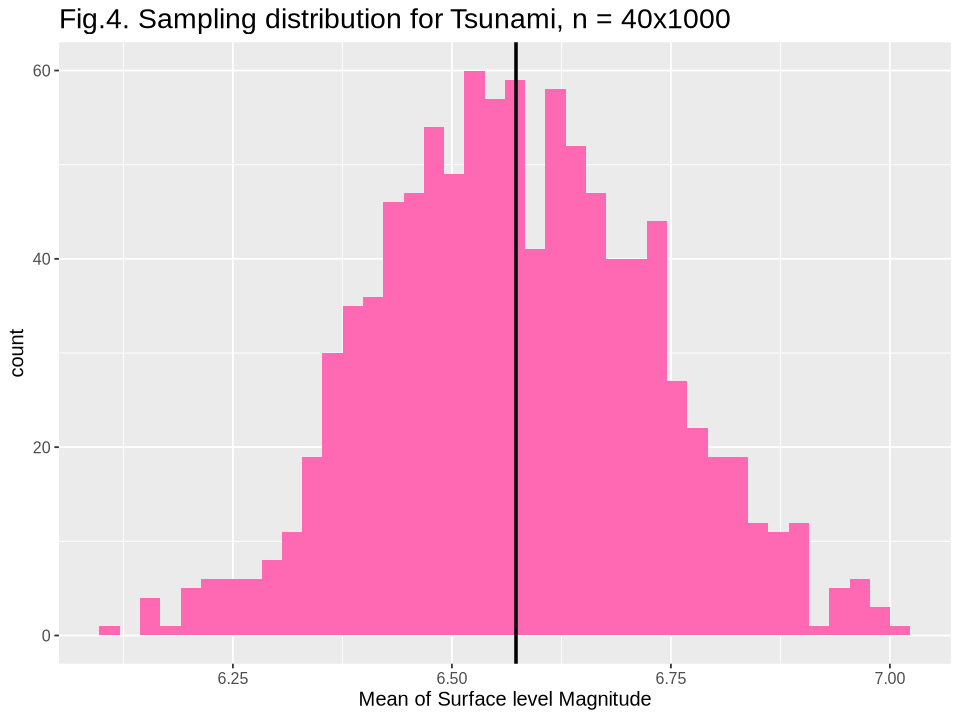

In [11]:
set.seed(1)

earthquake_sampling_dist <- 
    earthquake_pop %>% 
    rep_sample_n(size = 40, reps = 1000) %>%
    group_by(replicate) %>%
    summarize(sample_mean = mean(Ms.Magnitude)) %>%
    ggplot() + 
    geom_histogram(aes(x = sample_mean), bins = 40, fill = "hotpink") +
    geom_vline(xintercept = pop_mean, color = "black", lwd = 1) +
    ggtitle("Fig.4. Sampling distribution for Tsunami, n = 40x1000") +
    theme(plot.title = element_text(size = 17),
         text = element_text(size = 12)) +
    xlab("Mean of Surface level Magnitude")

earthquake_sampling_dist

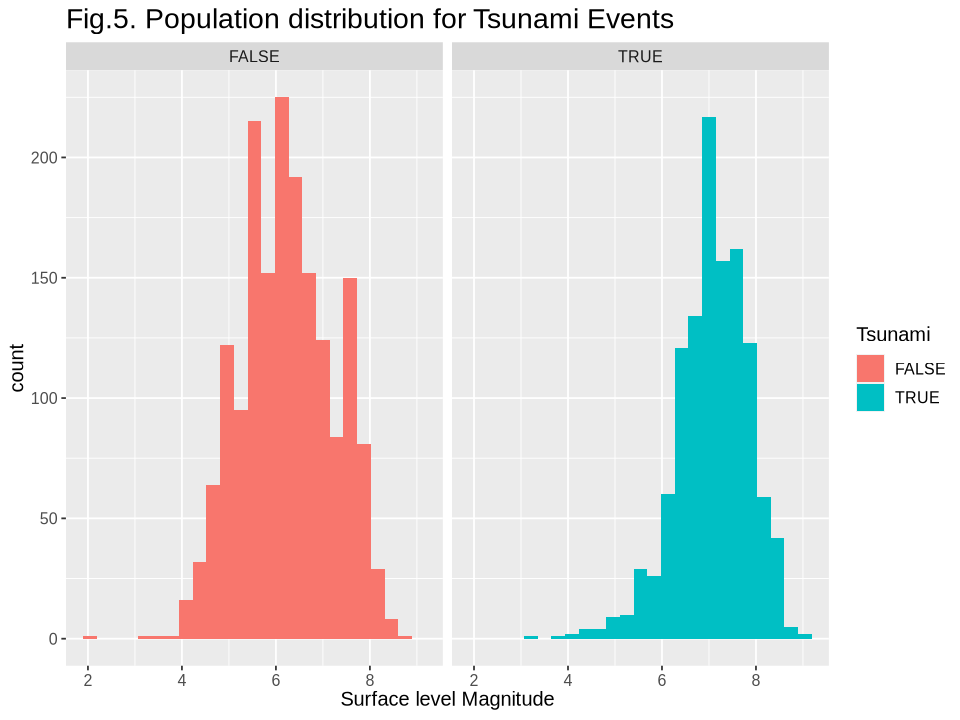

In [12]:
set.seed(1)

eathquake_distribution <- earthquake_pop %>%
  ggplot(aes(x = Ms.Magnitude, fill = Tsunami)) +
  geom_histogram(bins = 25) +
  ggtitle("Fig.5. Population distribution for Tsunami Events") +
  labs(x="Surface level Magnitude") +
  theme(plot.title = element_text(size = 17),
         text = element_text(size = 12)) +
  facet_wrap(~Tsunami)

eathquake_distribution

<font size="4"> **2.4. Bootstrap Method for Calculating the Difference in Means** </font> 

To determine whether there is a statistically significant difference between the earthquakes that do and do not cause tsunamis, we performed bootstrapping using the infer package and generated a 95% confidence interval

From this point, we used the `earthquake_sample` as our population, since our original dataset was very large to produce the bootstrap replicates. So, we used the sample of size = 100, which was representative of both the groups.

In [13]:
# GETTING THE CONFIDENCE INTERVALS
set.seed(1)

#performed bootstrapping using infer package
earthquake_bootstrapped <- earthquake_sample %>% 
    specify(formula = Ms.Magnitude ~ Tsunami) %>% 
    generate(type = "bootstrap", reps = 1000) %>% 
    calculate(stat = "diff in means", order = c(TRUE, FALSE))

#got the confidence intervals
earthquake_ci <- earthquake_bootstrapped %>%
    get_confidence_interval(level = 0.95, type = "percentile")

earthquake_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.7306786,1.383829


    Table 5: Confidence Interval produced by Bootstrapping


The confidence interval of [0.730, 1.383] suggests that we are ***95% confident that the true population parameter will fall between 0.730 and 1.383***.


We then shaded our derived confidence interval and graphed it with the population difference in means of the earthquakes that do and do not result in tsunamis.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


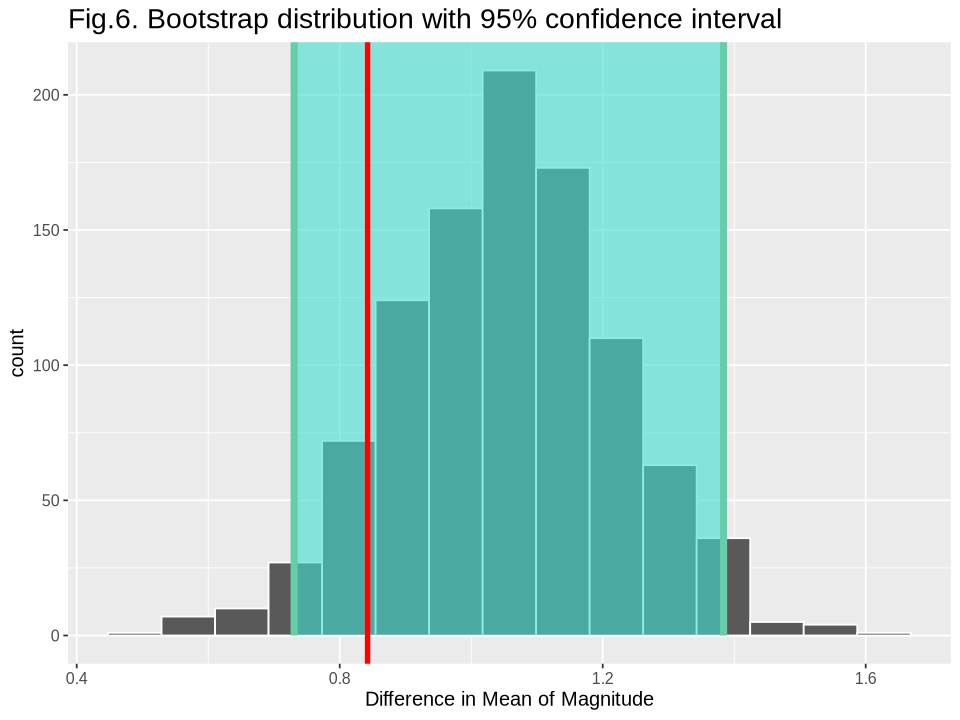

In [14]:
#visualize the confidence interval
set.seed(1)

earthquake_ci_plot <- visualize(earthquake_bootstrapped) + 
                      shade_confidence_interval(endpoints = earthquake_ci) +
                      labs(title = "Fig.6. Bootstrap distribution with 95% confidence interval",
                           x = "Difference in Mean of Magnitude",
                           y = "count") +
                      theme(plot.title = element_text(size = 17),
                            text = element_text(size = 12)) +
                      geom_vline(xintercept = pop_diff_mean,
                                 size = 1.5,
                                 colour = "red")

earthquake_ci_plot

As can be seen in the graph, **our confidence interval of this bootstrap sample does indeed capture our population parameter**.

<font size="4"> **2.5. Creating the Null Model and Visualizing the p-value** </font> 

Next, we conducted a 95% hypothesis test with the following properties:
- Population 1: All earthquakes that Cause Tsunamis
- Population 2: All earthquakes that Do Not Cause Tsunamis
- Significance level ($\alpha$): 5%

From this we get our hypotheseses,

$$H_0: \mu_{\text{1}} - \mu_{\text{2}} = 0$$ $$H_a: \mu_{\text{1}} - \mu_{\text{2}} \neq 0$$

The null hypothesis ($H_0$) states that there is no difference in the magnitude of earthquake that do and do not result in tsunami. While, the alternative hypothesis ($H_a$) states that there is a difference in the magnitude of earthquake that do and do not result in tsunami.

The significance level, denoted by $\alpha$ represents the threshold for rejecting the null hypothesis. A significance level of 0.05 means that we are willing to accept a 5% chance of mistakenly rejecting the null hypothesis and committing the Type 1 error. A lower $\alpha$ value would increase the chance of Type 2 error.

In [20]:
set.seed(1)

null_model_tsunami <- 
    earthquake_sample %>%
    specify(formula = Ms.Magnitude ~ Tsunami) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat="diff in means", order = c(TRUE, FALSE))

head(null_model_tsunami)

replicate,stat
<int>,<dbl>
1,0.128
2,-0.200
3,0.404
4,0.160
5,0.152
6,0.064


    Table 6: 1000 samples taken from the Null Model using Infer Package

In [16]:
set.seed(1)

observed_mean_diff <- earthquake_sample %>%
   specify(formula = Ms.Magnitude ~ Tsunami) %>%
   calculate(stat="diff in means", order = c(TRUE, FALSE))

observed_mean_diff

stat
<dbl>
1.056


    Table 7: observed difference in mean

Then, we calculated the ***observed difference in mean between our two populations, which is 1.056***.

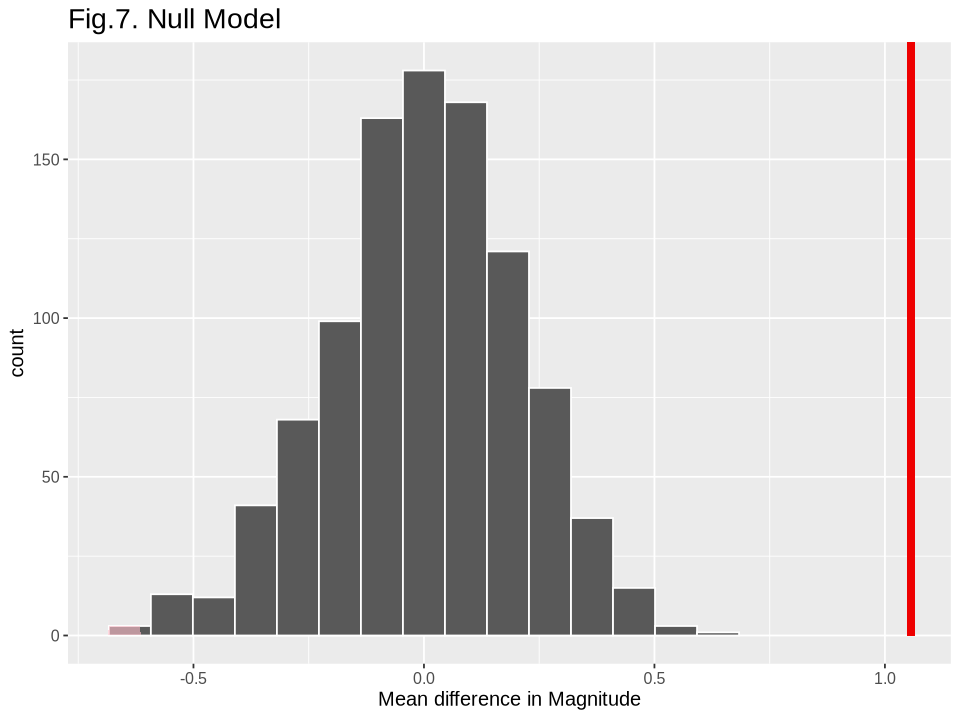

In [17]:
set.seed(1)

tsunami_result_plot <- 
    null_model_tsunami %>%
    visualize() + 
    shade_p_value(obs_stat = observed_mean_diff, direction = "two-sided") +
    labs(title = "Fig.7. Null Model",
         x = "Mean difference in Magnitude",
         y = "count") +
    theme(plot.title = element_text(size = 17),
          text = element_text(size = 12))

tsunami_result_plot

We then marked the observed difference in mean on our null model, and we can see visually that it is extremely unlikely that the difference in means is 1.056 under the null model.

After that we calculated the p-value using the `get_p_value()` function, where `obs_stat = observed_mean_diff` and `direction = "both"`.

In [18]:
set.seed(1)

p_tsunami <- null_model_tsunami %>%
  get_p_value(obs_stat = observed_mean_diff, direction = "both")

p_tsunami

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


    Table 8: p-value calculated from the Null Distribution

The unlikeliness of the test statistic occuring under the null hypothesis is further solidified by the p-value, which is < 0.001, which means that given the null hypothesis is true, the probability that the test statistic will occur is less than 0.001. Since p < 0.001, our significance level is set at 0.05, and p < 0.001 < 0.05, we can conclude that given a p-value < 0.001 and at a significance level of 0.05, we ***reject the null hypothesis($H_0$)***.

<font size="4"> **2.6. `Two-sample t-test` :Comparing the Means of Two Independent Populations** </font> 

To further examine our question, we also used the t.test function to obtain a confidence interval.

We considered the following hypothesises below:

$$H_0: \mu_{\text{1}} - \mu_{\text{2}} = 0$$ $$H_1: \mu_{\text{1}} - \mu_{\text{2}} \neq 0$$

To test the $H_0$, we used the following test statistic

$$T = \frac{\bar{x}_{\text{1}} - \bar{x}_{\text{2}}}{\sqrt{\frac{s^2_{\text{1}}}{n_1}+\frac{s^2_{\text{2}}}{n_2}}}
$$

In [19]:
set.seed(1)

TStatistic <- 
    tidy(
        t.test(x = earthquake_sample %>% filter(Tsunami == TRUE) %>% pull(Ms.Magnitude),
               y = earthquake_sample %>% filter(Tsunami == FALSE) %>% pull(Ms.Magnitude),
               alternative = "two.sided"))

TStatistic

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.056,7.05,5.994,5.892961,5.369498e-08,98,0.7003897,1.41161,Welch Two Sample t-test,two.sided


    Table 9: Results using t.test() from 2-sample t-test

<font size="5"> **3. Discussion** </font> 

<font size="4"> **3.1. Conclusion** </font>

Not only does the conclusion of the hypothesis testing reject the null hypothesis that **there is no significant difference between the magnitudes of earthquakes that do and do not cause tsunamis**, the confidence intervals generated by both bootstrapping and asymptotics does not include 0. Therefore, both bootstrapping and asymptotics seems to suggest that there in fact is a significant difference between the magnitudes of earthquakes that do and do not cause tsunamis.

We expected to see a significant difference between the mean magnitudes of the earthquakes that do and do not cause tsunamis, and that is what the study had concluded. With the information that this conclusion supplies, coastal cities prone to severe earthquakes could benefit since their legislatures could allocate more funds towards mitigating the effects of a tsunami.

<font size="4"> **3.2. Bootstrapping vs Asymptotics** </font>

Bootstrapping and asymptotics yielded pretty similar confidence intervals, with bootstrapping yielding a 95% confidence interval at [0.730, 1.383], and asymptotics yielding a 95% confidence interval at [0.700, 1.411]. Most importantly, both confidence intervals do not include the value ($\mu_{\text{1}} - \mu_{\text{2}} = 0$), so they lead to the same conclusion that **there in fact is a significant difference between the magnitudes of earthquakes that do and do not cause tsunamis**. Therefore, there does not seem to be one test that is clearly more appropriate than the other.

One reason that both methods yielded similar results could be because we had a very large sample size. Although the bootstrapping is using a normal distribution while the asymptotics is using a t-distribution, where the degree of freedom for the t-distribution is really big (due to the large sample size). When a t-distribution has a big sample size, its shape looks to be more and more like a normal distribution, which is what our bootstrap looks like. That being said, bootstrapping requires less assumptions than asymptotics, and is more beginner-friendly. For example, in order to use asymptotics, either a significantly large sample size is needed in order to use the central limit theorem, or a normally distributed sampling distribution is needed. However, for bootstraps, a small sample size is allowed. In our case, since our sample size is sufficiently large (greater than 30), this assumption is not an issue. Therefore, despite bootstrapping being more reliable, for this study, both methods are appropriate.

<font size="4"> **3.3. Future Research Question** </font>

We used surface wave magnitudes for this study, so one future question to consider is whether different types of magnitude measurements could lead to more accurate predictions of tsunamis. Another question could be: how can we accurately predict the severity of a tsunami based on the magnitude of preluding earthquakes?

<font size="5"> **4. References** </font> 

- What is a fault and what are the different types?. What is a fault and what are the different types? | U.S. Geological Survey. (n.d.). https://www.usgs.gov/faqs/what-a-fault-and-what-are-different-types


- The Science of Earthquakes. The Science of Earthquakes | U.S. Geological Survey. (n.d.). https://www.usgs.gov/programs/earthquake-hazards/science-earthquakes


- Tsunami generation: Earthquakes | National Oceanic and atmospheric ... (n.d.). https://www.noaa.gov/jetstream/tsunamis/tsunami-generation-earthquakes